In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
path = "http://www.iam.fmph.uniba.sk/ospm/Rosa/PDV/01_nhanes-weight.xls"
#path = "01_nhanes-weight.xls"
data = pd.ExcelFile(path).parse('Sheet1')
data["Age"] = data["Age"]/12
data = data.dropna()

data

Gender        Age  Weight  Height  Leg_Length  Arm_Length  Arm_circum  \
0          0  20.083333    64.7     163        34.2        36.2        29.0   
1          0  20.083333    54.0     153        37.2        34.0        26.1   
2          1  20.083333    61.4     165        37.7        35.0        31.4   
3          0  20.083333    74.0     171        37.9        36.2        29.8   
4          0  20.083333    63.6     159        38.1        34.0        29.2   
...      ...        ...     ...     ...         ...         ...         ...   
4974       1  79.833333    89.5     184        43.0        42.8        32.2   
4975       0  79.916667    78.6     151        35.6        34.2        33.5   
4976       1  79.916667    86.5     175        38.6        41.5        32.8   
4977       0  79.916667    58.0     163        40.2        37.5        26.2   
4978       1  79.916667    76.2     168        40.8        39.5        29.8   

      Waist  
0      89.6  
1      85.5  
2      70.1  
3      91.1  
4      74.3  
...     ...  
4974  112.8  
4975  114.9  
4976  100.2  
4977   82.8  
4978  103.5  

[4978 rows x 8 columns]

In [ ]:
Y = data["Gender"]
X = data[["Weight", "Height"]]
X

Weight  Height
0       64.7     163
1       54.0     153
2       61.4     165
3       74.0     171
4       63.6     159
...      ...     ...
4974    89.5     184
4975    78.6     151
4976    86.5     175
4977    58.0     163
4978    76.2     168

[4978 rows x 2 columns]

In [ ]:
# Trenovacia a validacna
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2)

# Standardizacia
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

X_train

array([[ 0.88216292,  1.02987198],
       [-0.68196192, -1.05667051],
       [ 1.07459468,  0.93051281],
       ...,
       [-0.45992527, -0.26179718],
       [ 0.94137269,  0.43371698],
       [ 0.77361167, -0.36115635]])

In [ ]:
# Najblizsi sused
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_pred = knn.predict(X_val)
accuracy = accuracy_score(y_val, y_pred) # pocet spravnych predikcii / pocet predikcii
accuracy

0.7459839357429718

In [ ]:
# Rozhodovacia hranica
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

Text(0, 0.5, 'Height')

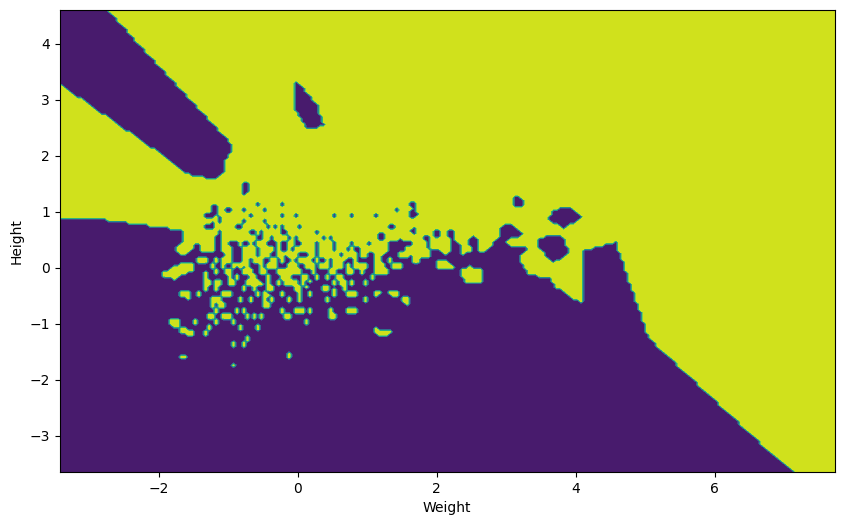

In [ ]:
# dokreslenie
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z)
plt.xlabel('Weight')
plt.ylabel('Height')

Text(0, 0.5, 'Height')

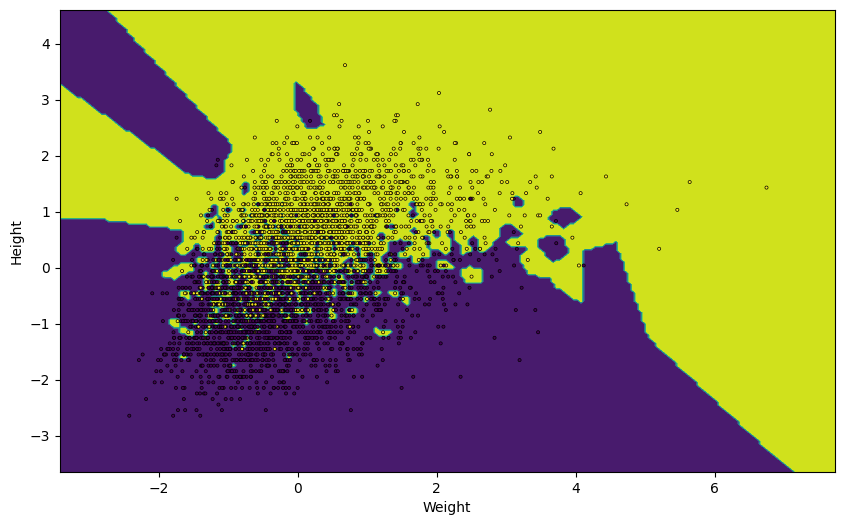

In [ ]:
# aj s trenovacimi bodmi
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train,
            edgecolor='k', linewidths=0.5, s=5, marker='o')
plt.xlabel('Weight')
plt.ylabel('Height')

In [ ]:
# k-NN
k = 5  # pocet susedov
knn2 = KNeighborsClassifier(n_neighbors=k)
knn2.fit(X_train, y_train)

y_pred = knn2.predict(X_val)
accuracy = accuracy_score(y_val, y_pred) # pocet spravnych predikcii / pocet predikcii
accuracy

0.8032128514056225

Text(0, 0.5, 'Height')

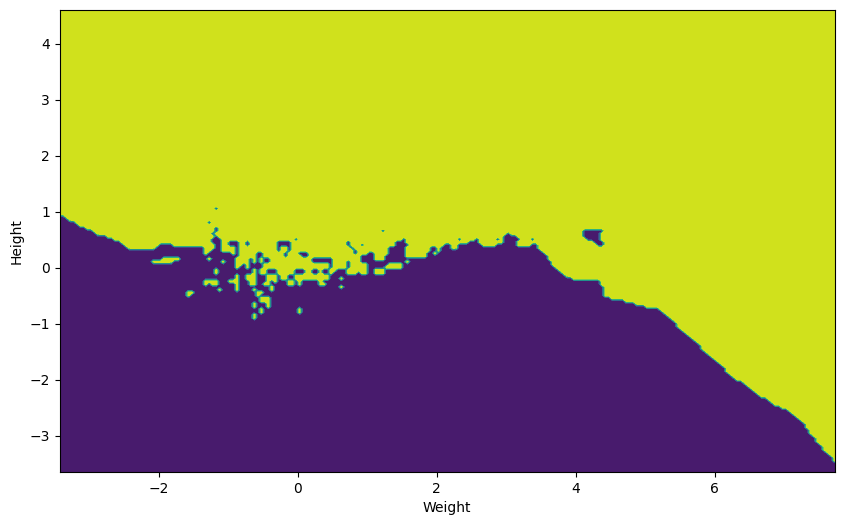

In [ ]:
# Rozhodovacia hranica
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))
Z = knn2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z)
plt.xlabel('Weight')
plt.ylabel('Height')

Text(0, 0.5, 'Height')

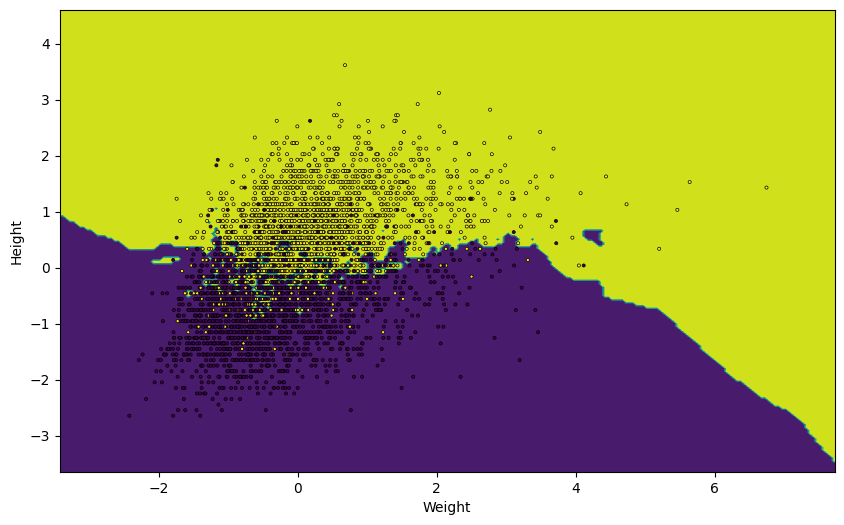

In [ ]:
# aj s trenovacimi bodmi
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train,
            edgecolor='k', linewidths=0.5, s=5, marker='o')
plt.xlabel('Weight')
plt.ylabel('Height')

In [ ]:
# Dobrovolna DU:
# A. Ako by to vyzeralo, keby sme data najprv nestandardizovali? Rozmyslite si, pri akych datach by vysledky bez standardizacie vyslovene neboli dobre.
# B. Najdite rozumne "k".
# C. Vyskusajte pridat aj dalsie premenne.